# DecisionTreeFactor

GTSAM Copyright 2010-2022, Georgia Tech Research Corporation,
Atlanta, Georgia 30332-0415
All Rights Reserved

Authors: Frank Dellaert, et al. (see THANKS for the full author list)

See LICENSE for the license information

<a href="https://colab.research.google.com/github/borglab/gtsam/blob/develop/gtsam/discrete/doc/DecisionTreeFactor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
    import google.colab
    %pip install --quiet gtsam
except ImportError:
    pass  # Not running on Colab, do nothing

A `DecisionTreeFactor` represents a function over a set of discrete variables, $f(X_1, X_2, ..., X_n)$. It is a versatile building block for representing potentials or probabilities in discrete factor graphs.

Internally, it uses an `AlgebraicDecisionTree` (ADT) to store the function's values. This representation can be very efficient, especially for sparse factors where many assignments have the same value (e.g., zero).

`DecisionTreeFactor` is the base class for more specialized factors like `DiscreteConditional`.

In [2]:
import gtsam
import numpy as np
import graphviz

from gtsam.symbol_shorthand import A, B

## Creating a DecisionTreeFactor

A factor is defined by its `DiscreteKeys` (the variables it depends on) and a table of values. The table specifies the factor's output for every possible assignment of its variables. The values in the table are ordered such that the last key varies fastest.

In [3]:
# Define keys for two binary variables
KeyA = (A(0), 2)
KeyB = (B(0), 2)

# --- Method 1: From a spec string ---
# The values correspond to assignments (A,B) in the order:
# (0,0), (0,1), (1,0), (1,1)
f1_string = gtsam.DecisionTreeFactor([KeyA, KeyB], "1 2 3 4")
print("--- Factor f1 from string ---")
f1_string.print()

# --- Method 2: From a list of values ---
f2_vector = gtsam.DecisionTreeFactor([KeyA], [0.8, 0.2])
print("\n--- Factor f2 from vector ---")
f2_vector.print()

--- Factor f1 from string ---
DecisionTreeFactor
 f[ (a0,2), (b0,2), ]
 Choice(b0) 
 0 Choice(a0) 
 0 0 Leaf    1
 0 1 Leaf    3
 1 Choice(a0) 
 1 0 Leaf    2
 1 1 Leaf    4

--- Factor f2 from vector ---
DecisionTreeFactor
 f[ (a0,2), ]
 Choice(a0) 
 0 Leaf  0.8
 1 Leaf  0.2


## Operations on DecisionTreeFactor

In [4]:
# --- Evaluate ---
# Get the factor's value for a specific assignment.
assignment = gtsam.DiscreteValues()
assignment[A(0)] = 1
assignment[B(0)] = 0

value = f1_string(assignment)
print(f"Value of f1 at A=1, B=0: {value}")

# --- Multiplication ---
# Multiplying factors corresponds to the product of their functions.
# The resulting factor is over the union of their variables.
# f3(A,B) = f1(A,B) * f2(A)
f3_product = f1_string * f2_vector
print("\n--- Product Factor f3 = f1 * f2 ---")
f3_product

Value of f1 at A=1, B=0: 3.0

--- Product Factor f3 = f1 * f2 ---


a0,b0,value
0,0,0.8
0,1,1.6
1,0,0.6
1,1,0.8


## Visualization

We can visualize the underlying Algebraic Decision Tree structure. This shows how the factor's values are stored efficiently. Each path from the root to a leaf corresponds to an assignment, and the leaf holds the value.

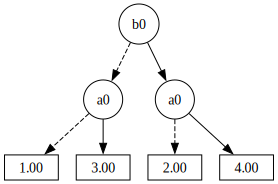

In [5]:
graphviz.Source(f1_string.dot())

### Rich Display in Jupyter
In a notebook, factors are displayed as easy-to-read tables.

In [6]:
f1_string

a0,b0,value
0,0,1
0,1,2
1,0,3
1,1,4
